Dataset Reference: https://www.kaggle.com/code/goyalshalini93/car-price-prediction-linear-regression-rfe/notebook

In [1]:
# import required libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as pp
import numpy as np
import seaborn as sb

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Step 1: Reading and Understanding the Data

In [3]:
# load data
df = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
# Checking the shape of the data
df.shape

(205, 26)

In [5]:
#checking the structure of the data
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
# Checking the number of null values in each column
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

The data contains no null values

In [7]:
# describe the data
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


The data is not normalised. ie mean = 0 and variance = 1. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Step 2 : Data Cleaning and Preparation

In [9]:
CompanyName = df['CarName'].apply(lambda x:x.split(' ')[0])
df.insert(3,'CompanyName',CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
#check the unique names of cars
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [11]:
#replace the incorrect company names with correct one
df.CompanyName = df.CompanyName.str.lower()

def replaceCompanyName(a,b):
    df.CompanyName.replace(a,b,inplace=True)
    
replaceCompanyName('maxda','mazda')
replaceCompanyName('porcshce','porsche')
replaceCompanyName('toyouta','toyota')
replaceCompanyName('vokswagen','volkswagen')
replaceCompanyName('vw','volkswagen')

df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [12]:
#check for duplicates
df.loc[df.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [13]:
#checking the namesof columns
df.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Step 3: Visualizing the data

#### 3.1 Visualising the target value "Price"

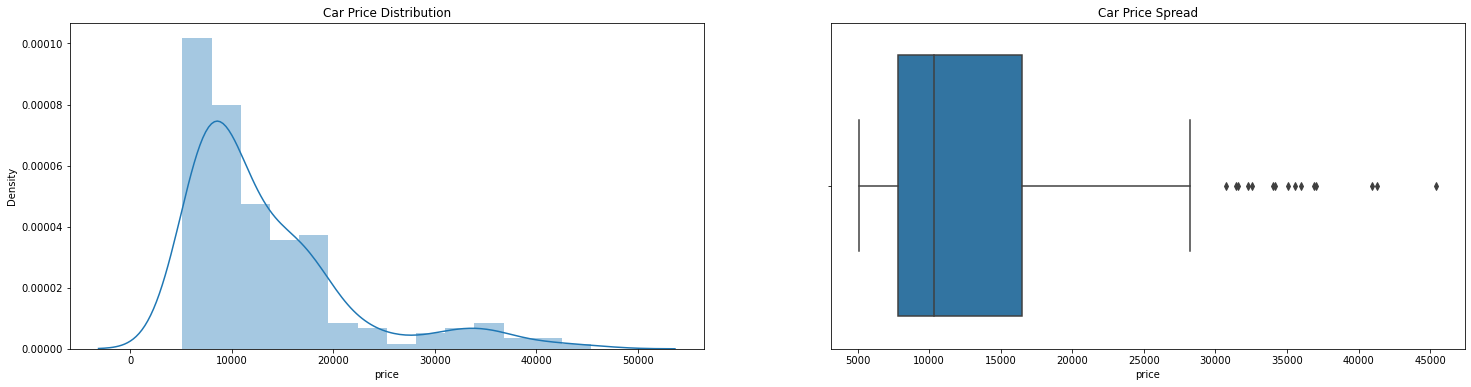

In [14]:
pp.figure(figsize=(25,6))
pp.subplot(1,2,1)
pp.title("Car Price Distribution")
sb.distplot(df.price)

pp.subplot(1,2,2)
pp.title("Car Price Spread")
sb.boxplot(df.price)

pp.show()

In [15]:
print(df.price.describe(percentiles=[0.25,0.50,0.75,.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


#### Inferences:

* The distribution graph is right skewed. ie, most of the values lies below 15000.
* There is a large difference between mean and median of the values
* The data is far spread out from the mean. ie 85% of data below 18500 and 15% lies between 18500 and 45400. This indicates large variance in thde car price

#### 3.2 Visualising the categorical values

- CompanyName
- Symboling
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheel

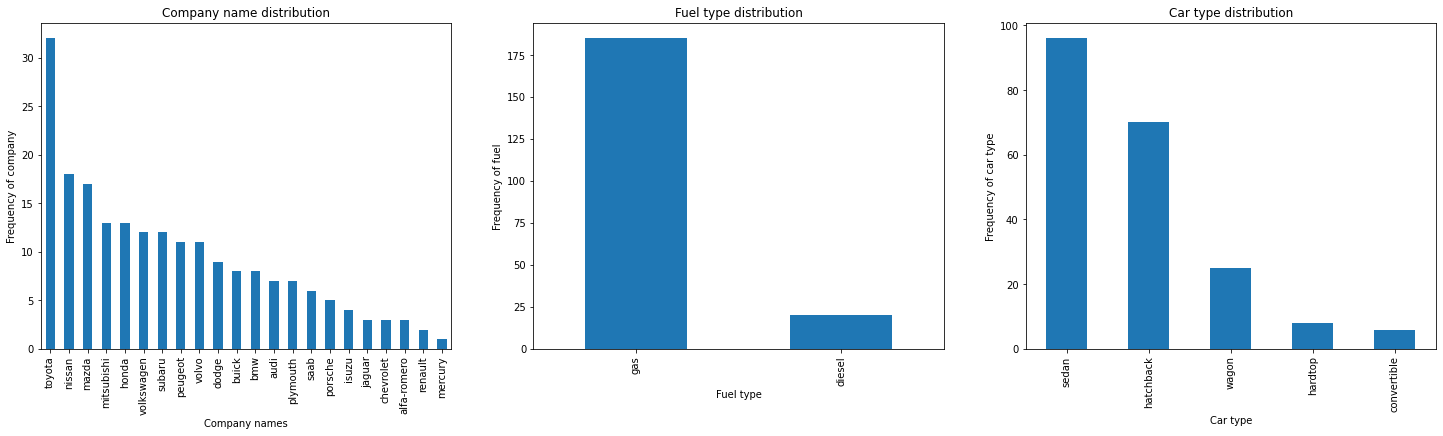

In [16]:
pp.figure(figsize=(25,6))
pp.subplot(1,3,1)
pp.title("Company name distribution")
plt = df.CompanyName.value_counts().plot(kind='bar')
plt.set(xlabel= 'Company names', ylabel='Frequency of company')


pp.subplot(1,3,2)
pp.title('Fuel type distribution')
plt = df.fueltype.value_counts().plot(kind='bar')
plt.set(xlabel = 'Fuel type', ylabel='Frequency of fuel')

pp.subplot(1,3,3)
pp.title("Car type distribution")
plt = df.carbody.value_counts().plot(kind='bar')
plt.set(xlabel='Car type', ylabel='Frequency of car type')

pp.show()

#### Inference
* Toyota company is most favorite car company
* Gas fuel type is more used than diesel fuel
* Sedan car type is mostly preferred cartype

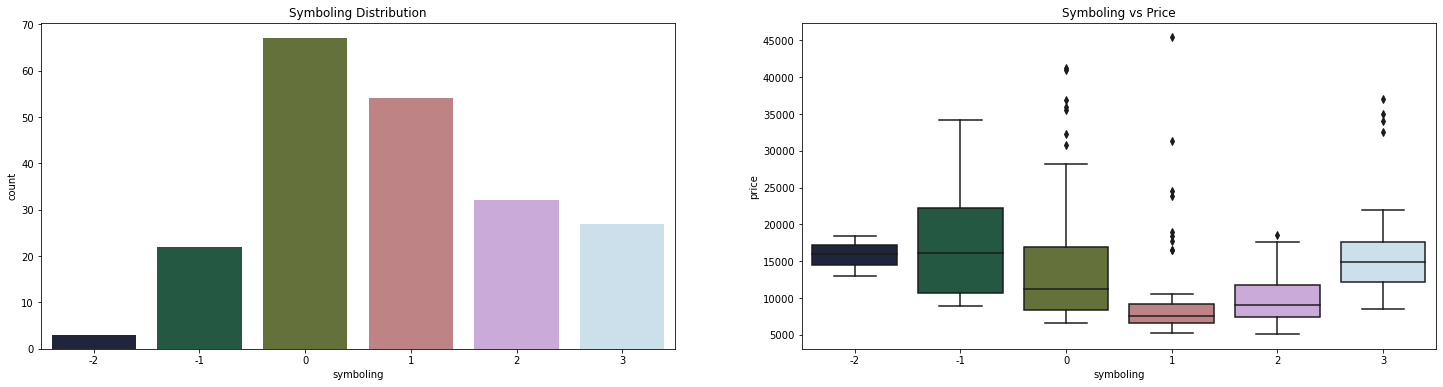

In [17]:
pp.figure(figsize=(25,6))

pp.subplot(1,2,1)
pp.title("Symboling Distribution")
sb.countplot(df.symboling,palette=("cubehelix"))

pp.subplot(1,2,2)
pp.title('Symboling vs Price')
sb.boxplot(x=df.symboling,y=df.price,palette=('cubehelix'))

pp.show()


#### Inference
* most sold cars are with symboling range of 0-1
* cars with symboling -1 has highest price. There is a dip in price with symboling 1

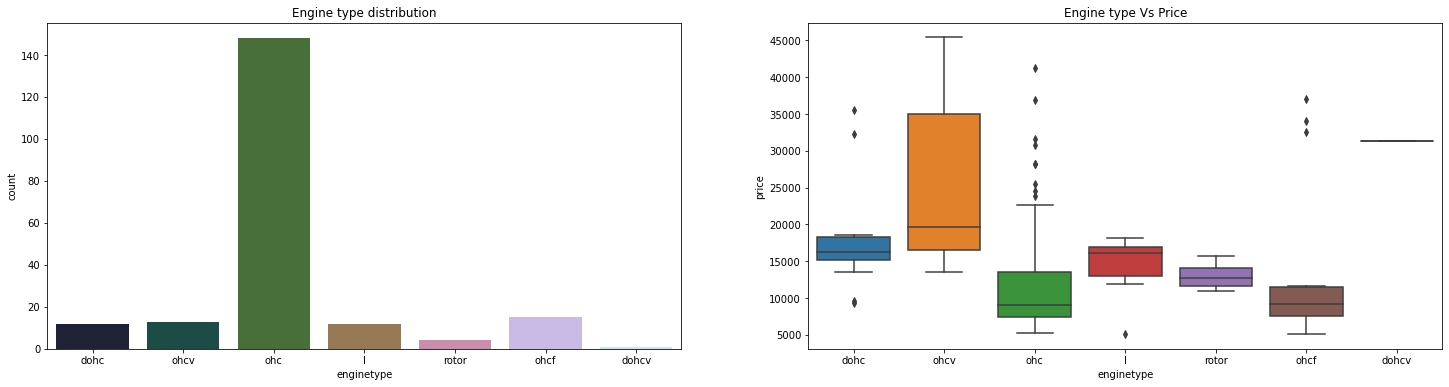

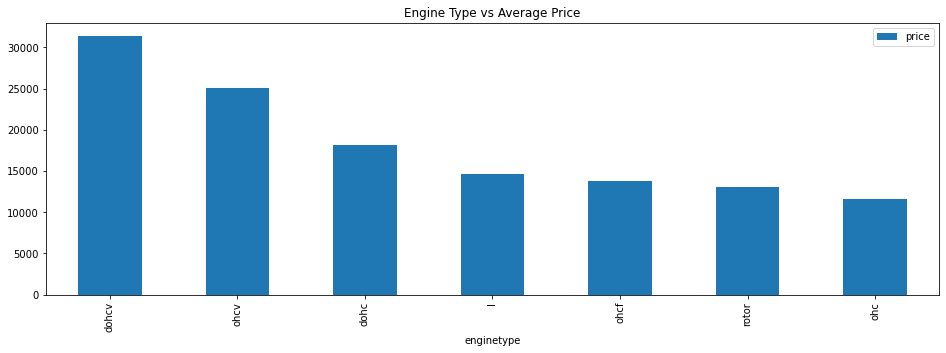

In [18]:
pp.figure(figsize=(25,6))
pp.subplot(1,2,1)
pp.title("Engine type distribution")
sb.countplot(df.enginetype,palette=("cubehelix"))

pp.subplot(1,2,2)
pp.title("Engine type Vs Price")
sb.boxplot(x=df.enginetype,y=df.price)

df1=pd.DataFrame(df.groupby(['enginetype'])["price"].mean().sort_values(ascending = False))
 
df1.plot.bar(figsize=(16,5))
pp.title('Engine Type vs Average Price')
pp.show()

#### Inferences
* ohc seems to be highly favoured engine type
* dbhcv has the highest average price and ohc and rotor has lowest average price

<Figure size 1800x432 with 0 Axes>

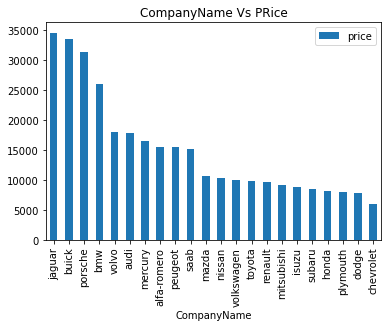

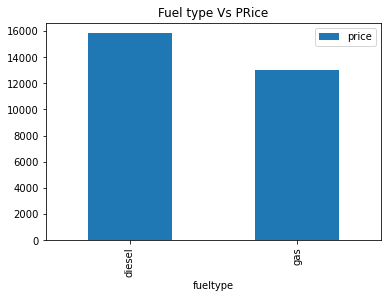

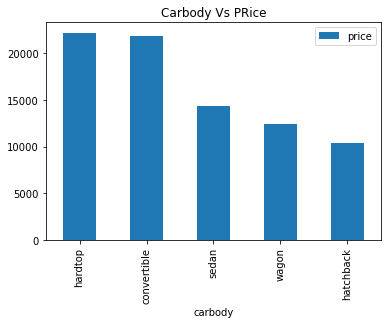

In [19]:
pp.figure(figsize=(25,6))

df1 = pd.DataFrame(df.groupby(['CompanyName'])['price'].mean().sort_values(ascending=False))
df1.plot.bar()
pp.title("CompanyName Vs PRice")
pp.show()

df1 = pd.DataFrame(df.groupby(['fueltype'])['price'].mean().sort_values(ascending=False))
df1.plot.bar()
pp.title("Fuel type Vs PRice")
pp.show()

df1 = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending=False))
df1.plot.bar()
pp.title("Carbody Vs PRice")
pp.show()

#### Inference
* jaguar has highest average price
* compared to diesel fuel type, gas has lesser price
* Among carbody, hardtop has highest price

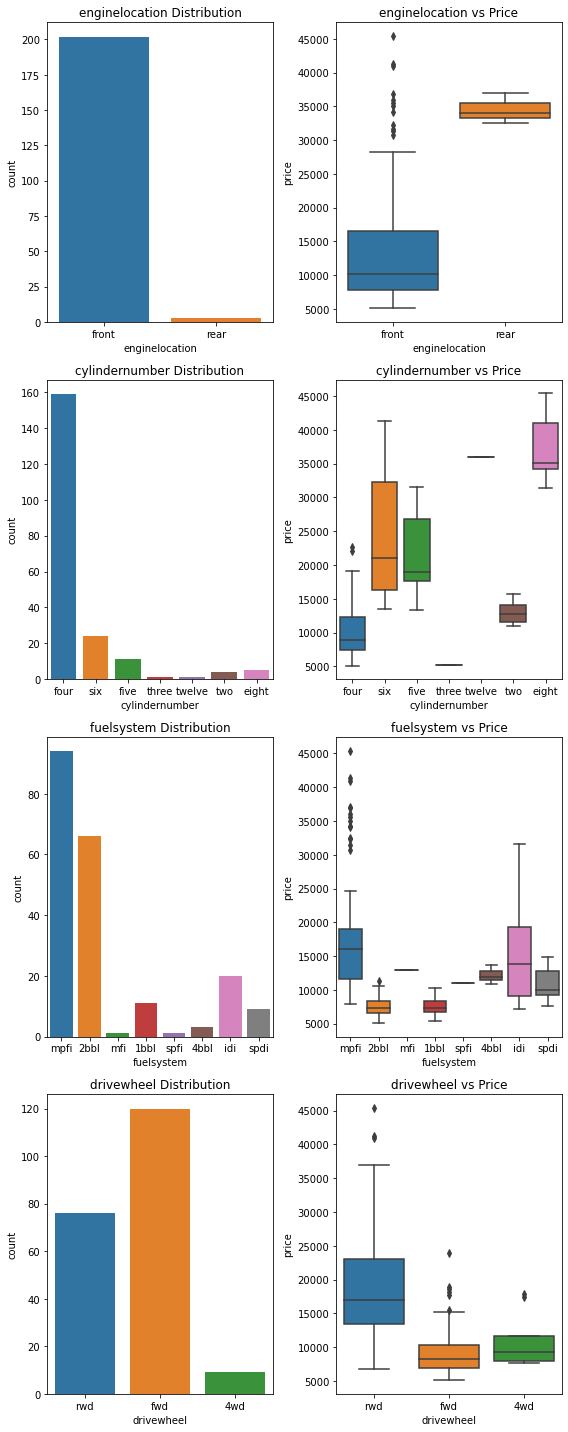

In [20]:
def plot_count(x,fig):
    pp.subplot(4,2,fig)
    pp.title(x+ ' Distribution')
    sb.countplot(df[x])
    pp.subplot(4,2,fig+1)
    pp.title(x+' vs Price')
    sb.boxplot(x=df[x],y=df.price)
    
    
pp.figure(figsize=(8,20))    
plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)
pp.tight_layout()

#### Inference
* enginelocation 'front' is highly used due to its low cost compared to 'rear' enginelocation
* A few data points are available for 'rear' type, so lesser accurate insight can only be made.
* Cylinder number four and six are highly recommonded
* mpfi and 2bbl are the most common type of fuel system.
* among the three driverwheel system, fwd driverwheel is the highly used one

#### 3.3 Visualising the numerical values

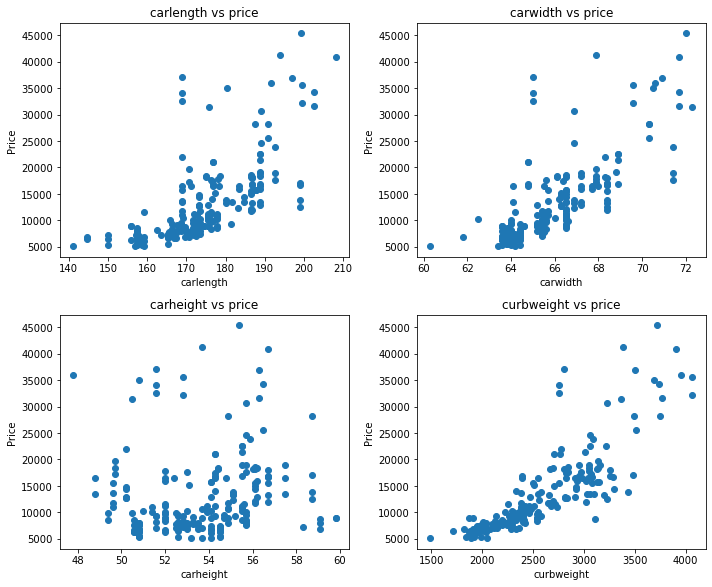

In [21]:
def scatter(x,fig):
    pp.subplot(5,2,fig)
    pp.title(x+' vs price')
    pp.scatter(df[x],df.price)
    pp.ylabel('Price')
    pp.xlabel(x)
     
pp.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

pp.tight_layout()

#### inference
* car weight,carwidth, carlength seems to has positive correlation w.r.t car price
* carheight has no significant impact on price

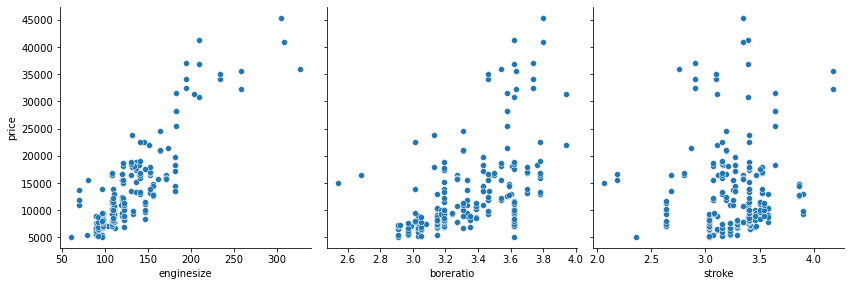

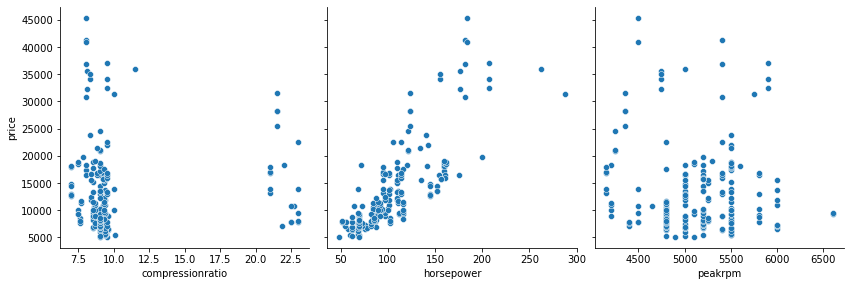

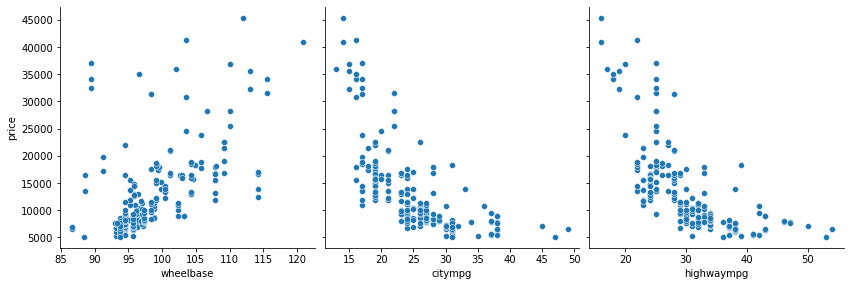

In [26]:
import matplotlib.pyplot as pp
def pplot(x,y,z):
    sb.pairplot(df, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    pp.show()

pplot('enginesize', 'boreratio', 'stroke')
pplot('compressionratio', 'horsepower', 'peakrpm')
pplot('wheelbase', 'citympg', 'highwaympg')

#### Inference
* enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
* citympg, highwaympg - seem to have a negative correlation with price.

### droping unnessasary fields

In [23]:
df.drop(['car_ID', 'symboling', 'CompanyName'], axis=1, inplace=True)

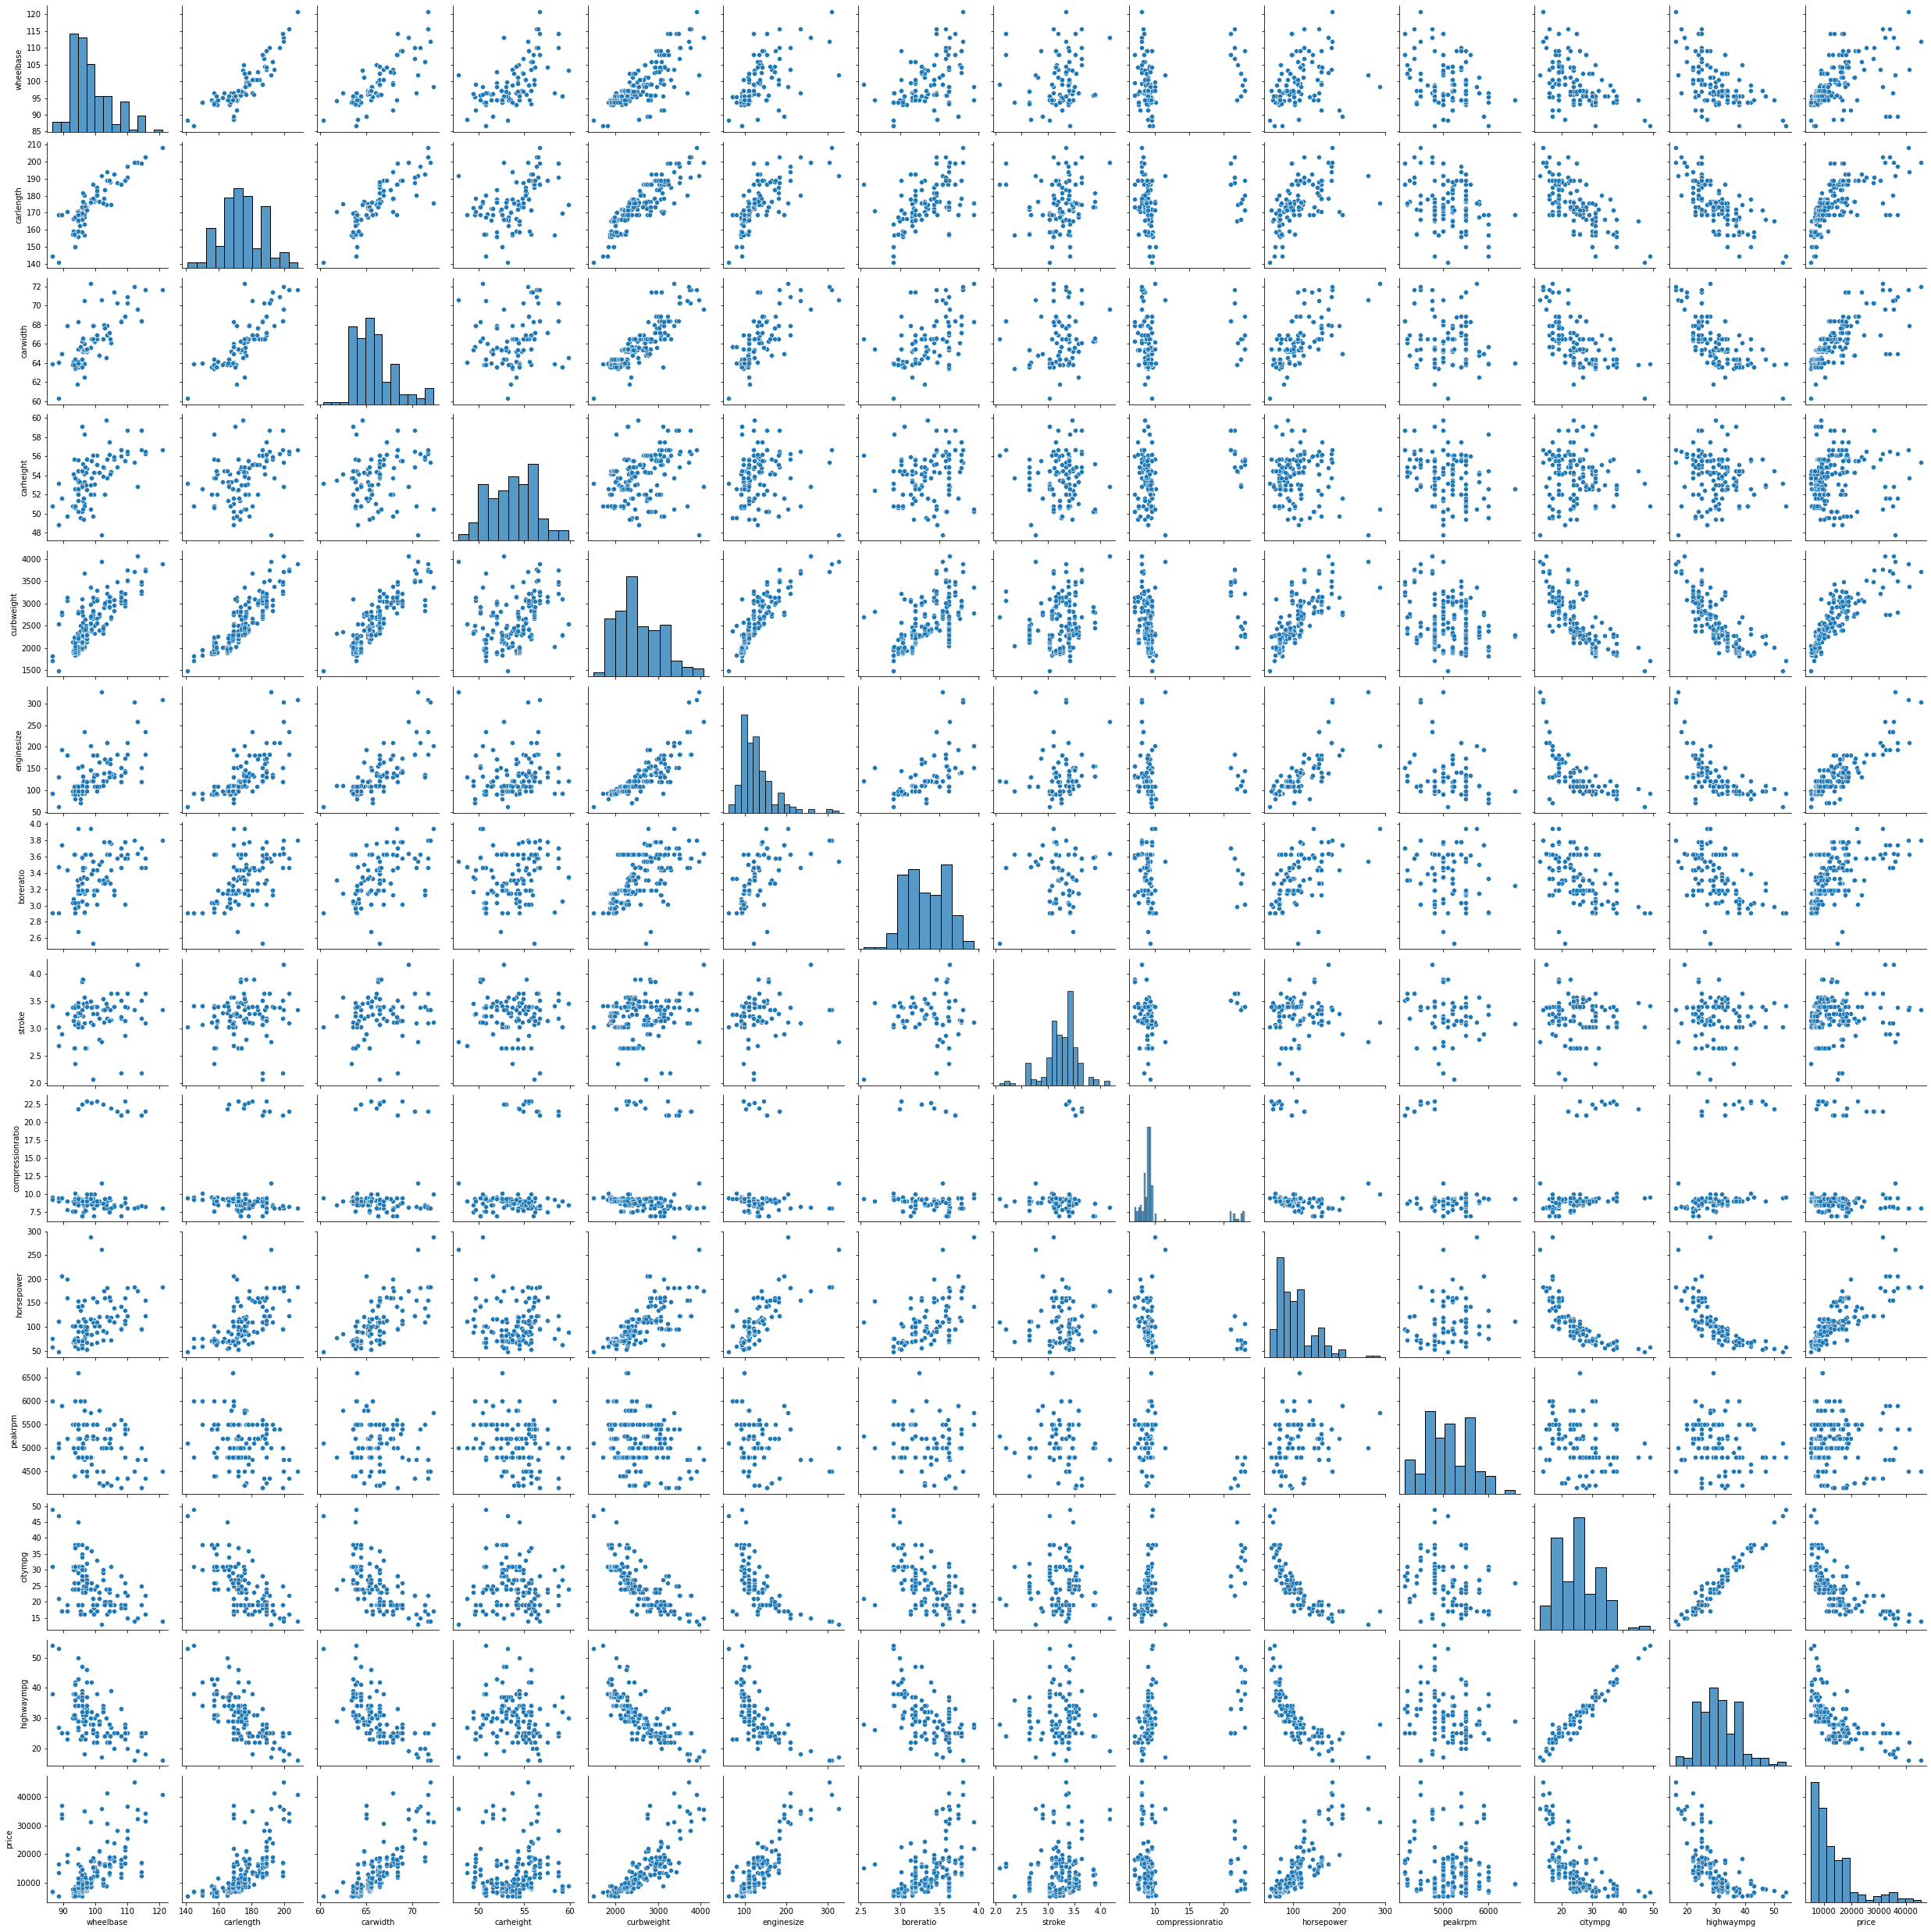

In [24]:
sb.pairplot(df)

#### Step 4 : Dummy Variables

In [27]:
def dummies(x,df1):
    temp = pd.get_dummies(df1[x],drop_first=True)
    df1 = pd.concat([df1,temp],axis=1)
    df1.drop([x],axis=1,inplace=True)
    return df1

df = dummies('fueltype',df)
df = dummies('aspiration',df)
df = dummies('carbody',df)
df = dummies('drivewheel',df)
df = dummies('enginetype',df)
df = dummies('cylindernumber',df)
df = dummies('doornumber',df)
df = dummies('enginelocation',df)
df = dummies('fuelsystem',df)


#### Step 5 : Train-Test Split and feature scaling

In [28]:
y = df['price'] #dependent variable, price.
x = df.iloc[:,:-1] #independent variables


In [ ]:
x = pd.DataFrame(x)

In [ ]:
x

#### checking multi-colinearity

<AxesSubplot:>

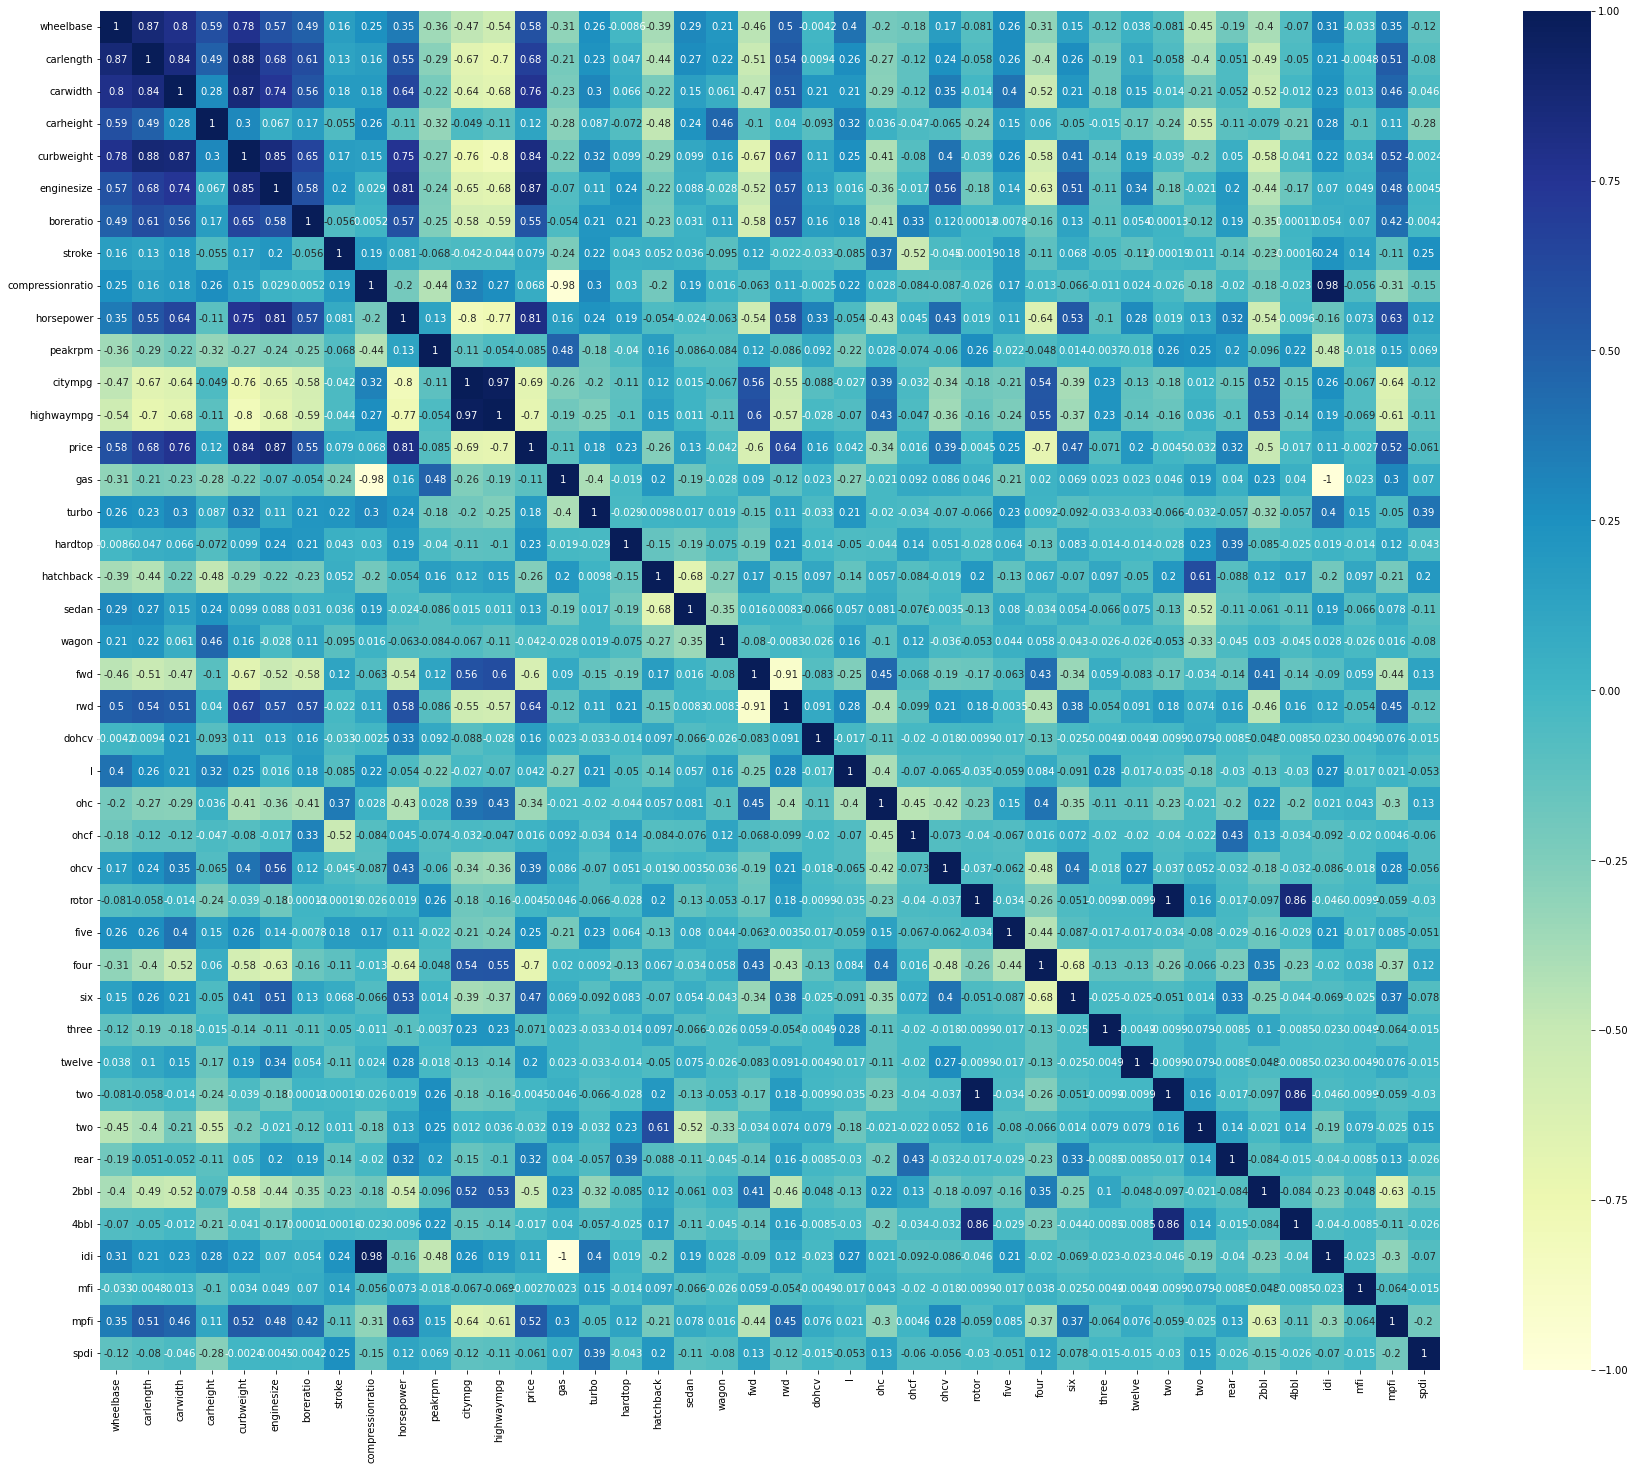

In [29]:
#Correlation using heatmap
pp.figure(figsize = (30, 25))
sb.heatmap(x.corr(), annot = True, cmap="YlGnBu")

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame(data = np.array(x.columns), columns=["attribute"])
vif['VIF'] = -1

for i in range(0, x.shape[1]): #looping through the feature set
    vif.loc[i,'VIF'] = variance_inflation_factor(x.values, i) # calculating VIF factor
    
print(vif)

           attribute          VIF
0          wheelbase    12.022691
1          carlength    15.311171
2           carwidth    11.577898
3          carheight     4.056483
4         curbweight    33.521267
5         enginesize    52.504855
6          boreratio     7.836276
7             stroke     3.869417
8   compressionratio   171.973762
9         horsepower    32.721314
10           peakrpm     3.901407
11           citympg    37.490610
12        highwaympg    36.008825
13             price    16.527520
14               gas  8398.015683
15             turbo     4.984748
16           hardtop     3.095265
17         hatchback    14.706970
18             sedan    18.733900
19             wagon     9.823173
20               fwd    11.107580
21               rwd    14.085963
22             dohcv     4.432715
23                 l     5.623665
24               ohc     7.510218
25              ohcf     7.122085
26              ohcv     4.253610
27             rotor          inf
28            

In [ ]:
df.columns

In [31]:
x.drop(['two', 'rotor', 'gas', 'idi'], axis=1, inplace=True)

In [32]:
vif = pd.DataFrame(data = np.array(x.columns), columns=["attribute"])
vif['VIF'] = -1

for i in range(0, x.shape[1]): #looping through the feature set
    vif.loc[i,'VIF'] = variance_inflation_factor(x.values, i) # calculating VIF factor
    
print(vif)

           attribute          VIF
0          wheelbase  3095.754462
1          carlength  3046.831006
2           carwidth  5325.146300
3          carheight  1546.814234
4         curbweight   775.124980
5         enginesize   313.948606
6          boreratio   945.107045
7             stroke   363.193492
8   compressionratio    45.942454
9         horsepower   243.007395
10           peakrpm   359.567876
11           citympg   562.304876
12        highwaympg   718.018498
13             price    59.161630
14             turbo     5.357015
15           hardtop     3.060700
16         hatchback    21.226609
17             sedan    31.291900
18             wagon     9.846931
19               fwd    25.404971
20               rwd    21.286773
21             dohcv     3.020805
22                 l     4.544962
23               ohc    26.176120
24              ohcf     7.447123
25              ohcv     4.086624
26              five     7.672763
27              four   124.650604
28            

In [33]:
#splitting dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

#### step 6: Training the Multiple Linear Regression Model on the Training Set

In [34]:
from sklearn.linear_model import LinearRegression
rg = LinearRegression()
rg.fit(x_train,y_train)

LinearRegression()

#### Accuracy of linear regression model

In [35]:
r2_train = rg.score(x_train,y_train)
print("accuracy on train data: ", r2_train)

accuracy on train data:  1.0


In [36]:
r2_test = rg.score(x_test,y_test)
print("accuracy on test data: ", r2_test)

accuracy on test data:  1.0


#### Predict accuracy

In [37]:
y_pred=rg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

1.0